<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Hypothesis Testing 2-sample Z test </h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

### Problem Statement

     A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import math
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

### Initial EDA 

In [4]:
df = pd.read_csv('Cutlets.csv')

In [5]:
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


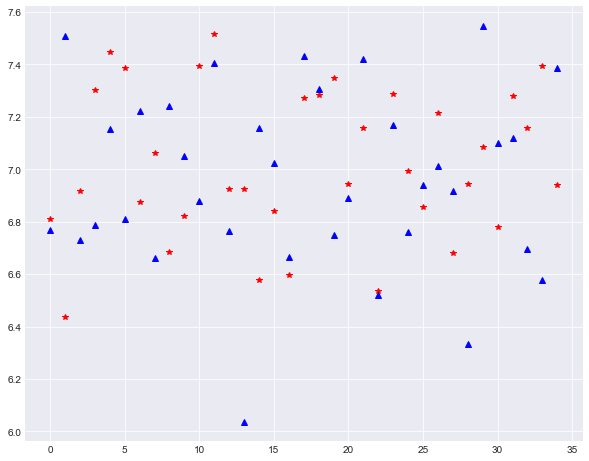

In [38]:
plt.figure(figsize=(10,8))

plt.plot(np.arange(0,35), df['Unit A'], 'r*', label = 'A')
plt.plot(np.arange(0,35), df['Unit B'], 'b^', label = 'B')


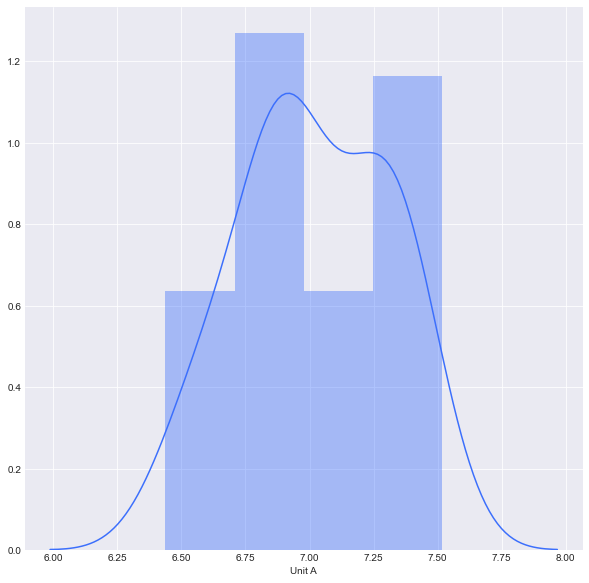

In [45]:
plt.figure(figsize=(10,10))
sns.distplot(df['Unit A'], color='#3c6ffc')

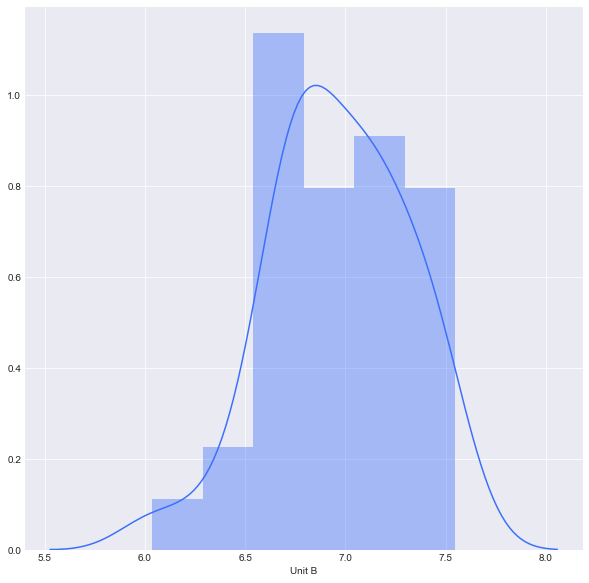

In [46]:
plt.figure(figsize=(10,10))
sns.distplot(df['Unit B'], color='#3c6ffc')

### Null Hypothesis is that there is no difference between the two samples

### HO: difference = 0

### HA: difference is non-Zero  ( can be =ve and -ve )

### We have to Test weather the difference is equal to zero 

### So the difference can be negative and positive hence its a two tail test

### Sample size is greater than 30 so we make use of central limit theorm and use z table

In [48]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


### Traditional method

In [92]:
#sample 1(Unit A)
x1 = 7.019091
n1 = 35
s1 = 0.288408

#Sample 2(Unit B)
x2 = 6.964297
n2 = 35
s2 = 0.343401

#Z critical 
#significance level  alpha  = 0.05
#area from left to 0.025 = 0.95+0.025 = 0.975
z_crit  = norm.ppf(0.975)
z_crit


1.959963984540054

In [94]:
z_test  = (x1-x2)-(0)/math.sqrt(((s1**2)/35)+((s2**2)/35))
z_test

0.05479400000000023

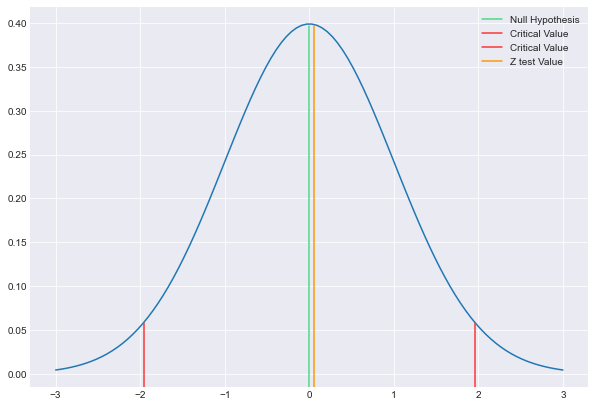

In [99]:
plt.figure(figsize=(10,7))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

xs = [0,0.17]

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x = 0, ymin = 0, ymax = 0.95, label = 'Null Hypothesis', color = '#4adb82')
plt.axvline(x = -1.959963984540054, ymin = 0, ymax = max(xs), label = 'Critical Value', color = '#fc3737')
plt.axvline(x = 1.959963984540054, ymin = 0, ymax = max(xs), label = 'Critical Value', color = '#fc3737')
plt.axvline(x = 0.05479400000000023, ymin = 0, ymax = 0.95, label = 'Z test Value', color = '#fc980c')
plt.legend()
plt.show()

In [103]:
1-norm.cdf(0.05479400000000023)

0.47815129026473235

### Method 2 using scipy.stats.ttest_ind()

In [112]:
#scipy.stats.CompareMeans.ztest_ind

In [111]:
stats.ttest_ind(df['Unit A'], df['Unit B'])

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

## It is absolutly clear that we have not enough evidence to reject the Null hypothesis 


### So we accept the null hypothesis